# Motivation

We are going to explore a few datasets containing observations of the initial stages of high mass star formation. There are different phases in star formation processes (see image below) such as quiescent or starless cores, proto-stellar cores or cores with young stars, compact HII regions and so on. Star formation is a very dynamic process and various chemical and physical properties changes with time during the formation of a star. 

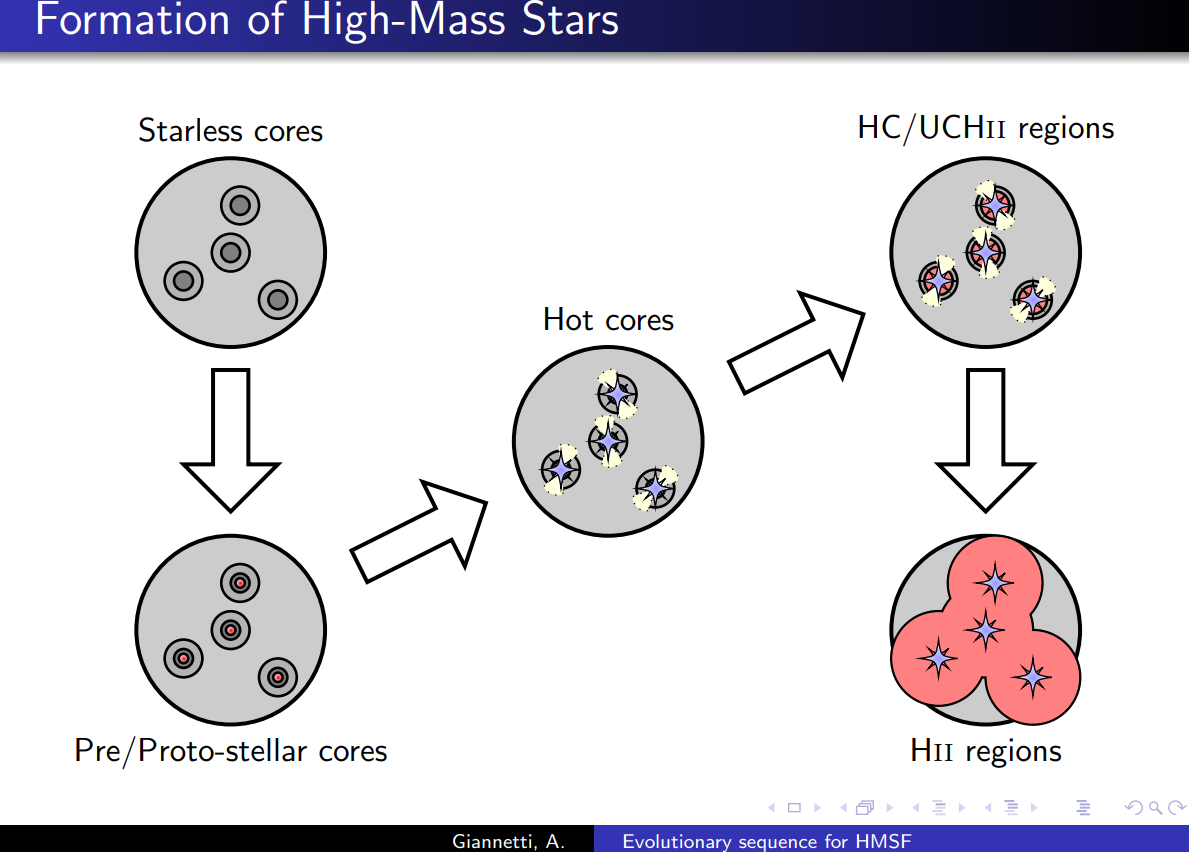

In [4]:
from IPython.display import Image
Image(filename='formation_of_high_mass_stars.png') 

In general, different phases of star formation are classified based on the infrared images of these objects (1st row of the image below). However, this is a kind of qualitative classification. In addition to this, scientists also need some  quantitative classification criteria. Quantitative parameters can be estimated using the molecular spectra as shown in the image below. For example, the area under the curve of the Gaussian line profiles  can be used to estimate the abundances of respective molecules. Recently, a number of different catalogs containing different quantitative chemical and physical parameters of these objects became available. Our aim is to identify the important physical/chemical parameters from the recently available catalogs that can be used to saliently classify the various phases quantitatively.

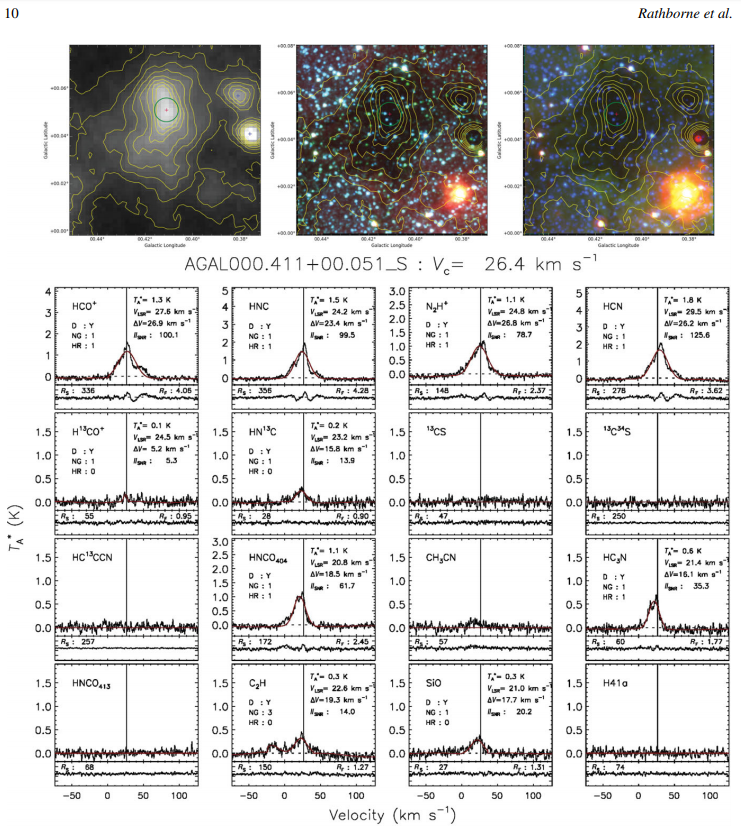

In [5]:
Image(filename='image_and_line.png') 

# Data Collection
In this section, data from three different catalogs are retrived and merged using Pandas read_csv and merge packages.

In [6]:
import pandas as pd
#First read the main survey file
malt_df=pd.read_csv('malt90lineinfo.csv', sep=',')

In [7]:
malt_df.head(10)

,ag_id,ag_name,ag_long,ag_lat,ag_flux_peak,classification,Vc,nNL,tau,dtau,...,h41a_fwhm,h41a_dfwhm,h41a_ii,h41a_dii,h41a_signoise,h41a_Pfit,h41a_iisnr,h41a_Rf,h41a_HR,h41a_Rs
0,AG0001,AGAL000.002+00.174_A,0.002,0.174,0.46,P,111.17,6.0,0.82,1.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
1,AG0002,AGAL000.002+00.174_B,0.002,0.174,0.46,P,-7.16,2.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
2,AG0003,AGAL000.006+00.157_A,0.006,0.157,1.76,U,-6.51,6.0,0.08,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
3,AG0004,AGAL000.006+00.157_B,0.006,0.157,1.76,U,107.19,6.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
4,AG0005,AGAL000.013-00.019_A,0.013,-0.019,5.11,Q,-18.23,4.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
5,AG0006,AGAL000.013-00.019_B,0.013,-0.019,5.11,Q,80.00,4.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
6,AG0007,AGAL000.021-00.051_A,0.021,-0.051,3.72,U,45.05,6.0,5.99,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
7,AG0008,AGAL000.021-00.051_B,0.021,-0.051,3.72,U,-14.92,5.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
8,AG0009,AGAL000.030+00.052_A,0.030,0.052,1.02,Q,84.79,7.0,5.99,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
9,AG0010,AGAL000.030+00.052_B,0.030,0.052,1.02,Q,-33.16,3.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0


In [8]:
#Read the distance information 
distance_df=pd.read_csv('malt90_kinematic_distance.csv', skiprows=51, sep='\s+')

In [9]:
distance_df.head(10)

,Name,GLON,GLAT,Rvel,Tvel,Rgal,Kdt,Kdn,b_Kdn,B_Kdn,...,b_Kdf,B_Kdf,PHISA,Mabsv,Dcode,Dflag,Dqual,Dbest,b_Dbest,B_Dbest
0,AGAL299.597+00.171_S,299.597,0.171,-7.60,-27.91,8.17,4.20,0.72,0.06,1.46,...,6.94,8.34,0.59,9.89,11,N,4,0.72,0.06,1.46
1,AGAL300.164-00.087_S,300.164,-0.087,-39.47,-28.96,7.00,4.27,4.27,4.27,4.27,...,4.27,4.27,0.00,-32.15,2,BT,7,4.27,4.27,4.27
2,AGAL300.218-00.111_S,300.218,-0.111,-40.31,-29.06,6.98,4.28,4.28,4.28,4.28,...,4.28,4.28,0.00,-36.28,2,BT,7,4.28,4.28,4.28
3,AGAL300.323-00.199_S,300.323,-0.199,-37.52,-29.26,7.06,4.29,4.29,4.29,4.29,...,4.29,4.29,0.10,-15.66,2,BT,7,4.29,4.29,4.29
4,AGAL300.341-00.214_S,300.341,-0.214,-38.57,-29.30,7.03,4.29,4.29,4.29,4.29,...,4.29,4.29,0.40,-15.66,2,BT,7,4.29,4.29,4.29
5,AGAL300.381-00.287_S,300.381,-0.287,31.63,-29.37,10.24,4.30,-9.99,0.00,-9.99,...,10.80,12.13,0.82,-38.75,1,FO,9,11.45,10.80,12.13
6,AGAL300.403+00.544_S,300.403,0.544,-34.79,-29.41,7.15,4.30,4.30,3.39,4.30,...,4.30,5.21,0.08,-46.17,2,BT,7,4.30,4.30,5.21
7,AGAL300.456-00.189_S,300.456,-0.189,26.55,-29.51,9.92,4.31,-9.99,0.00,-9.99,...,10.36,11.65,0.91,-25.56,1,FO,9,11.00,10.36,11.65
8,AGAL300.491-00.176_A,300.491,-0.176,8.82,-29.58,8.93,4.31,-9.99,0.00,-9.99,...,8.79,10.03,0.94,-46.17,1,FO,7,9.41,8.79,10.03
9,AGAL300.491-00.176_B,300.491,-0.176,27.87,-29.58,10.00,4.31,-9.99,0.00,-9.99,...,10.49,11.79,0.96,-46.17,1,FO,9,11.13,10.49,11.79


In [10]:
#Read physical parameters such as density and temperature
physic_param_df=pd.read_csv('malt90density_temp.csv',skiprows=41,sep='\s+')

In [11]:
physic_param_df.head(10)

,ID,f_ID,Radius,<Td>,e_<Td>,E_<Td>,"Td,p","e_Td,p","E_Td,p",<Ng>,<logNg>,e_<logNg>,"Ng,p","logNg,p","e_logNg,p",Class,f_Class
0,AGAL000.002+00.174,m,16.6,25.0,1.0,1.0,24.0,2.0,2.000,0.020,-1.690,0.040,0.045,-1.35,0.05,PDR,NaN
1,AGAL000.006+00.157,m,57.1,22.9,0.3,0.3,21.0,2.0,2.000,0.058,-1.240,0.010,0.209,-0.68,0.03,Uncertain,NaN
2,AGAL000.013-00.019,m,96.8,35.6,0.4,0.5,30.0,3.0,4.000,0.081,-1.093,0.006,0.380,-0.42,0.06,Quiescent,C
3,AGAL000.021-00.051,m,43.0,24.9,0.4,0.5,23.0,2.0,2.000,0.204,-0.690,0.010,0.372,-0.43,0.04,Uncertain,NaN
4,AGAL000.030+00.052,m,34.0,32.1,0.9,1.0,31.0,3.0,4.000,0.040,-1.400,0.020,0.087,-1.06,0.06,Quiescent,NaN
5,AGAL000.033+00.022,m,29.7,34.0,1.0,1.0,33.0,4.0,5.000,0.078,-1.110,0.020,0.117,-0.93,0.06,H_II_region,NaN
6,AGAL000.039-00.207,22.2,27.7,1.0,1.0,28.0,3.0,3.0,0.027,-1.570,0.030,0.051,-1.290,0.05,Quiescent,NaN,NaN
7,AGAL000.049+00.029,52.1,35.9,0.8,0.9,31.0,4.0,4.0,0.091,-1.040,0.010,0.204,-0.690,0.06,Quiescent,C,NaN
8,AGAL000.053-00.207,65.9,23.4,0.2,0.3,24.0,2.0,2.0,0.059,-1.230,0.009,0.178,-0.750,0.04,H_II_region,NaN,NaN
9,AGAL000.063-00.079,m,91.5,20.6,0.1,0.1,17.0,1.0,1.000,0.254,-0.595,0.005,0.794,-0.10,0.03,Quiescent,NaN


In [12]:
#now add the distance information to the main dataframe, wherever available

distance_df.rename(columns={"Name": "ag_name"}, inplace=True)
malt_df_distance = pd.merge(malt_df, distance_df, how='outer', on='ag_name')

In [13]:
len(malt_df), len(malt_df_distance)

(3556, 3556)

In [14]:
#now add the physical parameters, wherever available
def remove_last_char(str):
    return str[:-2]
malt_df_distance['ag_name_without_ext']=malt_df_distance['ag_name'].apply(remove_last_char)

physic_param_df.rename(columns={"ID": "ag_name_without_ext"}, inplace=True)

In [15]:
malt_df_distance_params = pd.merge(malt_df_distance, physic_param_df, how='outer', on='ag_name_without_ext')

In [16]:
malt_df_distance_params.head(10)

,ag_id,ag_name,ag_long,ag_lat,ag_flux_peak,classification,Vc,nNL,tau,dtau,...,"e_Td,p","E_Td,p",<Ng>,<logNg>,e_<logNg>,"Ng,p","logNg,p","e_logNg,p",Class,f_Class
0,AG0001,AGAL000.002+00.174_A,0.002,0.174,0.46,P,111.17,6.0,0.82,1.34,...,2.0,2.0,0.020,-1.690,0.040,0.045,-1.35,0.05,PDR,NaN
1,AG0002,AGAL000.002+00.174_B,0.002,0.174,0.46,P,-7.16,2.0,0.00,0.00,...,2.0,2.0,0.020,-1.690,0.040,0.045,-1.35,0.05,PDR,NaN
2,AG0003,AGAL000.006+00.157_A,0.006,0.157,1.76,U,-6.51,6.0,0.08,0.31,...,2.0,2.0,0.058,-1.240,0.010,0.209,-0.68,0.03,Uncertain,NaN
3,AG0004,AGAL000.006+00.157_B,0.006,0.157,1.76,U,107.19,6.0,0.00,0.00,...,2.0,2.0,0.058,-1.240,0.010,0.209,-0.68,0.03,Uncertain,NaN
4,AG0005,AGAL000.013-00.019_A,0.013,-0.019,5.11,Q,-18.23,4.0,0.00,0.00,...,3.0,4.0,0.081,-1.093,0.006,0.380,-0.42,0.06,Quiescent,C
5,AG0006,AGAL000.013-00.019_B,0.013,-0.019,5.11,Q,80.00,4.0,0.00,0.00,...,3.0,4.0,0.081,-1.093,0.006,0.380,-0.42,0.06,Quiescent,C
6,AG0007,AGAL000.021-00.051_A,0.021,-0.051,3.72,U,45.05,6.0,5.99,3.88,...,2.0,2.0,0.204,-0.690,0.010,0.372,-0.43,0.04,Uncertain,NaN
7,AG0008,AGAL000.021-00.051_B,0.021,-0.051,3.72,U,-14.92,5.0,0.00,0.00,...,2.0,2.0,0.204,-0.690,0.010,0.372,-0.43,0.04,Uncertain,NaN
8,AG0009,AGAL000.030+00.052_A,0.030,0.052,1.02,Q,84.79,7.0,5.99,0.00,...,3.0,4.0,0.040,-1.400,0.020,0.087,-1.06,0.06,Quiescent,NaN
9,AG0010,AGAL000.030+00.052_B,0.030,0.052,1.02,Q,-33.16,3.0,0.00,0.00,...,3.0,4.0,0.040,-1.400,0.020,0.087,-1.06,0.06,Quiescent,NaN


In [17]:
#write all the information to a csv file
malt_df_distance_params.to_csv('malt90_complete_catalog.csv', index=False)